--------------------------------------------------------

# Fourier regression model to generate daily time series from monthly temperature data

Case: Bogor Climatological Station, 1984-2021

--------------------------------------------------------

# 1 Introduction

In the sphere of meteorology, the significance of statistical models in comprehending and forecasting diverse weather patterns is incontestable. Within this context, the Fourier regression model has emerged as a formidable asset, specifically in generating daily time series from monthly temperature data (Wilks, 1998). The model lays a robust foundation for simulating temperature patterns, yielding crucial insights that are indispensable for weather prediction, climate change studies, and managing water resources.

The Fourier regression model has been proven to be a highly effective tool for generating daily time series from monthly temperature data, enhancing our understanding and prediction capabilities in weather forecasting, climate change studies, and water resource management. This model's unique ability to incorporate historical context allows it to capture intricate dependencies and transitions in temperature data, which are crucial in understanding temperature patterns.

By applying Fourier series, it is possible to reduce the number of parameters involved in the process, thereby simplifying complex calculations and making the model more efficient. Moreover, the Fourier regression model can seamlessly replace missing values and handle anomalies, which are often challenges in data analysis. This enables more accurate simulations and predictions, making it a vital tool in fields such as agriculture and urban planning.

The Fourier regression model's success in generating daily time series from monthly temperature data not only contributes to our understanding of weather patterns but also provides practical solutions for real-world challenges, making it a powerful instrument in various domains.


# 2 Configuration

Configuration is a crucial aspect of setting up any data analysis or processing workflow. Proper configuration ensures seamless access to data, efficient execution of tasks, and smooth integration of required tools and libraries. This article covers several essential subtopics related to configuration, such as connecting Google Drive to Colab, installing packages, importing libraries, and setting up working directories.

## 2.1 Google Drive directory into Colab

Connecting Google Drive to Colab is a vital step when working with data stored in Google Drive. It allows us to access and manipulate files directly from our Colab notebook. To connect our Google Drive, we can use the `google.colab.drive` module to mount our drive, enabling seamless access to our files and folders.

**Notes**

This is only apply if we are working in Colab

In [ ]:
# Connect Google Drive directory into Colab
from google.colab import drive

# Unmount the drive
drive.flush_and_unmount()

# Mount the drive again
drive.mount('/content/drive')


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


## 2.2 Working Directories

Setting up working directories involves defining the input and output directory paths for our project. This ensures that our code knows where to find the input data and where to store the results. Properly organizing our working directories makes it easier to manage our project, share it with others, and maintain a clean and structured codebase.

In [ ]:
import os

# Define the Google Drive path
working_dir = '/content/drive/MyDrive/MSc_IPB_Graduate_program/02_Fundamental_Courses/GFM1622_3_Advanced_Climatological_Methods/exercises/climgen'
station_path = f'{working_dir}/station'
output_path = f'{working_dir}/output'
image_path = f'{working_dir}/image'

# List of folder directories
folder_directories = [
    working_dir, station_path, output_path, image_path
]

# Create the folder directories if they don't already exist
for directory in folder_directories:
    os.makedirs(directory, exist_ok=True)

# Combine the paths
full_path = os.path.join(working_dir, station_path)

# List the contents of the directory
directory_contents = os.listdir(full_path)
directory_contents


['bogor_rainfall.csv', 'bogor_temperature.csv']

# 3 Data

Daily temperature data of Bogor Climatological Station from 1984-2021 were used in this analysis, downloaded from BMKG Data Online (http://dataonline.bmkg.go.id/) in `*.xlsx` format. The file then manipulated by remove the logo and unecessary text, , aggregated into monthly, leaving only two columns, namely `date` in column A and `temperature` in column B for the header with the format extending downwards, and save as `*.csv` format.

| date | rainfall |
|---|---|
| 01-Jan-1984 | 24.4 |
| 02-Jan-1984 | 24.0 |
| 03-Jan-1984 | 25.6 |
| ... | ... |
| ... | ... |
| 22-Dec-2021 | NaN |
| ... | ... |
| 30-Dec-2023 | 26.5 |
| 31-Dec-2023 | 27.2 |

The final input file is accessible via this link:


# 4 Implementation

In the implementation phase of this analysis, we utilized Python and the Pandas, Numpy and Matplotlib  library to develop a Fourier regression model to generate daily time series from monthly temperature data.

This comprehensive how-to guide explains the entire process, starting with reshaping the data to ensure compatibility with the model, generate Fourier regression, estimate the temperature, calculate the error. The final step involves chart generation, effectively visualizing the results for clear interpretation and analysis.

## 4.1. Reshape the data

The first step in our analysis involves pre-processing and reshaping the data to fit the requirements of the subsequent statistical modeling. Our raw temperature data, originally in a CSV file, consists of daily temperature readings recorded over several years. In this data, dates are represented in a 'YYYY-MM-DD' format. However, for our analysis, we require the 'day of the year' and the 'year' as separate variables.

We start by loading the data into a Pandas DataFrame. Next, we convert the 'date' column into a datetime format using the `pd.to_datetime()` function, which facilitates date-specific manipulations. This allows us to extract the 'day of the year' and the 'year' information from each date and store these in new columns titled 'dayofyear' and 'year', respectively.

Since we have multiple temperature readings per day, we average these readings for each day of the year across all years. We do this by grouping the data by 'dayofyear' and 'year', and then calculating the mean temperature for each group using the `groupby()` and `mean()` functions.

However, this leaves us with a long format DataFrame, where each row represents a day of a particular year. For easier visualization and modeling, we convert this into a wide format DataFrame, where each column represents a year and each row represents a day of the year. This transformation is performed using the `unstack()` function.

Lastly, we reset the DataFrame index for neatness and compatibility with future operations. The resulting DataFrame is saved into a new CSV file. This reshaping of data forms the foundation for our Fourier regression model and helps ensure accuracy and efficiency in the subsequent analysis.

In [ ]:
import pandas as pd

# Read the CSV file
temperature_df = pd.read_csv(f'{station_path}/bogor_temperature.csv', sep=';')

# Convert the 'date' column to datetime type
temperature_df['date'] = pd.to_datetime(temperature_df['date'])

# Create 'dayofyear' and 'year' columns
temperature_df['dayofyear'] = temperature_df['date'].dt.dayofyear
temperature_df['year'] = temperature_df['date'].dt.year

# Group by 'dayofyear' and 'year' and calculate the average temperature
grouped_temperature_df = temperature_df.groupby(['dayofyear', 'year'])['temperature'].mean()

# Use unstack to pivot on the 'year' level of the index
wide_format_df = grouped_temperature_df.unstack(level='year')

# Reset the index
wide_format_df.reset_index(inplace=True)

# Save the resulting DataFrame into a new CSV file
wide_format_df.to_csv(f'{output_path}/bogor_temperature_wide_format.csv', sep=';')

# Preview the output
wide_format_df


year,dayofyear,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,24.4,26.4,26.6,25.0,26.2,25.9,24.6,24.7,25.1,...,24.4,26.2,25.3,24.1,26.5,27.7,26.9,25.0,24.6,25.9
1,2,24.0,26.2,25.5,23.7,25.7,25.3,25.1,24.6,24.4,...,25.4,26.2,25.8,NaN,25.5,25.9,27.0,26.0,25.7,26.1
2,3,25.6,24.5,26.1,23.6,26.6,25.3,24.5,24.7,25.3,...,25.6,26.4,25.6,24.7,25.9,27.8,26.2,26.8,26.1,25.6
3,4,24.3,24.6,25.5,24.7,26.3,25.9,24.1,24.1,24.7,...,26.4,24.2,25.6,24.7,26.9,24.9,25.5,26.6,25.8,25.4
4,5,25.1,24.6,24.2,25.7,26.8,25.4,24.8,24.5,26.2,...,24.8,25.5,26.4,26.0,25.7,26.1,25.9,26.7,25.2,24.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,25.0,23.9,23.6,25.7,25.1,25.3,25.1,24.5,25.3,...,26.1,26.0,26.2,26.1,25.8,NaN,27.3,25.1,26.5,24.5
362,363,23.6,25.0,24.3,26.7,24.7,25.2,26.4,23.9,24.3,...,26.1,25.0,26.6,27.2,26.6,NaN,27.1,26.1,26.3,26.1
363,364,25.2,25.5,24.2,26.9,24.2,24.8,26.2,24.4,23.7,...,26.3,25.0,27.1,26.1,26.1,26.2,28.0,27.0,25.6,26.5
364,365,24.1,25.4,24.7,26.5,25.6,24.9,25.1,25.2,23.6,...,26.1,24.4,24.4,26.8,24.9,25.9,25.7,25.7,25.9,27.2


## 4.2. Daily to Monthly

In addition to the daily analysis, we decided to explore the temperature trends on a monthly basis. The process for reshaping the data for monthly temperature averages mirrors the daily approach.

First, we load the raw temperature data from a CSV file into a Pandas DataFrame and convert the 'date' column to a datetime format. With the datetime format, we're able to extract the 'month' and 'year' from each date, creating new columns for each.

As with the daily analysis, we handle multiple temperature readings per day by averaging these for each month of each year. We achieve this by grouping the data by 'month' and 'year', then calculating the mean temperature for each group.

To facilitate further analysis and visualization, we convert this long format DataFrame to a wide format DataFrame, with each column representing a year and each row representing a month. This is done using the `unstack()` function.

After resetting the DataFrame index for better data structure, we save the resulting DataFrame into a new CSV file. This CSV file contains average monthly temperatures over the years and will be useful for understanding broader temperature trends and providing context to our Fourier regression model.

In [ ]:
import pandas as pd

# Read the CSV file
temperature_df = pd.read_csv(f'{station_path}/bogor_temperature.csv', sep=';')

# Convert the 'date' column to datetime type
temperature_df['date'] = pd.to_datetime(temperature_df['date'])

# Create 'month' and 'year' columns
temperature_df['month'] = temperature_df['date'].dt.month
temperature_df['year'] = temperature_df['date'].dt.year

# Group by 'month' and 'year' and calculate the average temperature
grouped_temperature_df = temperature_df.groupby(['month', 'year'])['temperature'].mean()

# Use unstack to pivot on the 'year' level of the index
wide_format_monthly_df = grouped_temperature_df.unstack(level='year')

# Reset the index
wide_format_monthly_df.reset_index(inplace=True)

# Save the resulting DataFrame into a new CSV file
wide_format_monthly_df.to_csv(f'{output_path}/bogor_temperature_monthly_avg_wide.csv', sep=';')

# Preview the output
wide_format_monthly_df


year,month,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,24.700000,24.961290,24.693548,24.864516,25.700000,25.277419,24.619355,25.316129,24.967742,...,25.070968,25.158065,24.641935,25.209091,26.409677,25.883871,25.738710,25.828571,25.990000,25.245161
1,2,24.606897,25.503571,24.600000,24.560714,25.517241,24.396429,25.178571,24.800000,25.041379,...,25.572414,25.842857,25.039286,25.007143,25.750000,24.967857,25.589286,25.965385,25.662069,25.460714
2,3,24.883871,25.641935,24.845161,25.490323,25.487097,24.925806,25.277419,25.370968,25.477419,...,26.183871,26.180645,25.561290,25.624138,26.474194,25.785714,26.048387,25.974194,26.235484,25.887097
3,4,25.293333,25.686667,25.736667,26.120000,26.190000,25.786667,26.140000,25.610000,25.596667,...,25.990000,26.456667,26.196667,26.135294,26.713333,26.137931,26.293333,26.500000,26.682759,26.220000
4,5,24.958065,25.883871,26.212903,25.674194,26.141935,25.567742,25.848387,26.241935,25.929032,...,26.103226,26.219355,26.248387,26.277778,27.090323,26.490323,26.612903,27.080645,26.903846,26.870968
5,6,25.346667,25.376667,25.666667,25.976667,25.500000,25.356667,25.660000,25.873333,25.826667,...,26.260000,26.337931,26.476667,26.300000,26.160000,26.273333,26.186667,26.400000,26.732143,25.860000
6,7,25.029032,24.648387,25.083871,25.703226,25.645161,25.245161,25.054839,25.754839,25.251613,...,25.806667,25.493103,25.764516,26.152000,26.119355,25.996667,25.758065,25.983333,26.145161,26.000000
7,8,24.987097,25.254839,24.935484,25.677419,25.619355,25.725806,25.174194,25.758065,25.261290,...,25.816129,NaN,25.696774,26.241935,26.087097,26.209677,25.880645,25.680000,26.470968,26.016129
8,9,24.673333,25.463333,25.080000,26.376667,26.120000,25.556667,25.650000,25.843333,25.606667,...,25.960000,NaN,26.286667,26.244828,26.263333,26.641667,26.133333,26.253333,26.873333,26.303333
9,10,25.796774,25.558065,25.809677,26.574194,26.016129,25.819355,26.238710,26.416129,25.070968,...,26.290323,26.122581,26.825806,26.803226,25.945161,26.546154,26.587097,26.709677,26.296154,26.451613


## 4.3. Assigning monthly data into across the corresponding days of the month

In order to prepare our dataset for Fourier regression modeling, we need to map the average monthly temperature values to their corresponding days of the year. This step is crucial as it enables the creation of a continuous time series from the previously calculated monthly averages.

We begin this process by defining the number of days in each month, differentiating between leap and non-leap years. Then, we create a new DataFrame, dayofyear_df, with a 'dayofyear' column that sequentially enumerates each day of the year from 1 to 366. A binary 'leap' column is also added to indicate if the day corresponds to a leap year.

To map the 'dayofyear' to the corresponding month, we create a 'month' column using `np.repeat()` to repeat the month index according to the number of days in each month. This column is then adjusted for non-leap years.

The average monthly temperatures, stored in `monthly_avg_df`, are merged with the `dayofyear_df` DataFrame, repeating each monthly average across the corresponding days of the month. As a result, we obtain a DataFrame with daily granularity, which contains the corresponding average monthly temperature for each day.

We then handle the 366th day of non-leap years, setting the temperature to NaN, as it doesn't exist in those years.

Finally, we remove the unnecessary 'month' and 'leap' columns, reset the index, and save this DataFrame into a new CSV file. This final, reshaped DataFrame serves as our input for the Fourier regression modeling, enabling us to predict temperatures at a daily level from average monthly temperatures.

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
monthly_avg_df = pd.read_csv(f'{output_path}/bogor_temperature_monthly_avg_wide.csv', sep=';')

# Define the number of days in each month for leap and non-leap years
days_in_month_leap = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
days_in_month_non_leap = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Create an empty DataFrame with one row for each day of the year
dayofyear_df = pd.DataFrame({'dayofyear': np.arange(1, 367)})

# Determine the leap years
dayofyear_df['leap'] = (dayofyear_df['dayofyear'] == 366)

# Add a 'month' column that maps 'dayofyear' to the corresponding month
dayofyear_df['month'] = np.repeat(np.arange(1, 13), days_in_month_leap)

# Adjust the length of the 'month' column for normal years
dayofyear_df.loc[~dayofyear_df['leap'], 'month'] = np.repeat(np.arange(1, 13), days_in_month_non_leap)

# Merge 'dayofyear_df' with 'monthly_avg_df' to repeat each monthly average for each day of the corresponding month
dayofyear_df = dayofyear_df.merge(monthly_avg_df, on='month', how='left')

# Determine the years
years = monthly_avg_df.columns[2:]  # Assumes the year columns start from the third column

# Set the values of dayofyear 366 to NaN for non-leap years
for year in years:
    leap = int(year) % 4 == 0
    if not leap:  # Adjusted condition here, set NaN for non-leap years
        dayofyear_df.loc[(dayofyear_df['leap'] == True) & (dayofyear_df[year].notnull()), year] = np.nan

# Drop the unnecessary columns
dayofyear_df.reset_index(drop=True, inplace=True)
dayofyear_df = dayofyear_df.drop(columns=['month', 'leap'])

# Save the resulting DataFrame into a new CSV file
dayofyear_df.to_csv(f'{output_path}/bogor_temperature_dayofyear_avg_wide.csv', sep=';')

# Preview the output
dayofyear_df


,dayofyear,Unnamed: 0,1984,1985,1986,1987,1988,1989,1990,1991,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,0,24.700000,24.961290,24.693548,24.864516,25.700000,25.277419,24.619355,25.316129,...,25.070968,25.158065,24.641935,25.209091,26.409677,25.883871,25.738710,25.828571,25.99000,25.245161
1,2,0,24.700000,24.961290,24.693548,24.864516,25.700000,25.277419,24.619355,25.316129,...,25.070968,25.158065,24.641935,25.209091,26.409677,25.883871,25.738710,25.828571,25.99000,25.245161
2,3,0,24.700000,24.961290,24.693548,24.864516,25.700000,25.277419,24.619355,25.316129,...,25.070968,25.158065,24.641935,25.209091,26.409677,25.883871,25.738710,25.828571,25.99000,25.245161
3,4,0,24.700000,24.961290,24.693548,24.864516,25.700000,25.277419,24.619355,25.316129,...,25.070968,25.158065,24.641935,25.209091,26.409677,25.883871,25.738710,25.828571,25.99000,25.245161
4,5,0,24.700000,24.961290,24.693548,24.864516,25.700000,25.277419,24.619355,25.316129,...,25.070968,25.158065,24.641935,25.209091,26.409677,25.883871,25.738710,25.828571,25.99000,25.245161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,11,24.858065,25.632258,24.787097,25.503226,24.687097,25.380645,25.232258,25.364516,...,25.970968,25.519355,26.306452,26.122581,26.041935,26.116667,26.151613,26.070968,25.86129,26.000000
362,363,11,24.858065,25.632258,24.787097,25.503226,24.687097,25.380645,25.232258,25.364516,...,25.970968,25.519355,26.306452,26.122581,26.041935,26.116667,26.151613,26.070968,25.86129,26.000000
363,364,11,24.858065,25.632258,24.787097,25.503226,24.687097,25.380645,25.232258,25.364516,...,25.970968,25.519355,26.306452,26.122581,26.041935,26.116667,26.151613,26.070968,25.86129,26.000000
364,365,11,24.858065,25.632258,24.787097,25.503226,24.687097,25.380645,25.232258,25.364516,...,25.970968,25.519355,26.306452,26.122581,26.041935,26.116667,26.151613,26.070968,25.86129,26.000000


## 4.4. Fourier Series Modeling and Coefficient Extraction

The next step in the analysis process involves fitting a Fourier series to our daily temperature data. The Fourier series is a mathematical tool used for analyzing periodic functions, making it suitable for modeling periodic patterns in weather data like temperature.

To begin, we first load the reshaped DataFrame containing the daily average temperatures. Next, we define a Fourier function, specifying the form it should take. The function is expressed in terms of trigonometric terms (cosine and sine functions) and includes coefficients that we aim to estimate (a0, a1, b1, a2, b2).

To perform this estimation, we iterate over each year in the DataFrame. For each year, we calculate new variables 'T', 'm', 'D', and 't'. These variables represent respectively the month, the day of the month, the number of days in the month, and a transformed time index (where each month is considered as a unit time interval). We exclude data points with NaN or infinite values.

We then utilize the curve_fit function from the scipy.optimize module to fit the Fourier function to the temperature data for each year. This function returns the optimal values for the coefficients a0, a1, b1, a2, and b2 that best fit the data.

In cases where there's insufficient data to fit the Fourier series, we handle the errors and assign NaN values to the coefficients for that year.

Once we obtain the coefficients for each year, we save this data into a new CSV file. This file will then be used to generate our Fourier regression model and perform temperature estimation. The generated Fourier coefficients provide insights into the amplitude and phase of the cyclical patterns in the temperature data.

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import calendar

# Read the CSV file
df = pd.read_csv(f'{output_path}/bogor_temperature_dayofyear_avg_wide.csv', sep=';')

# Drop the 'Unnamed: 0' column
#df = df.drop(columns=['Unnamed: 0'])

# Fourier function
def fourier(x, a0, a1, b1, a2, b2):
    t_prime = 2 * np.pi * x / 12
    return a0 + a1 * np.cos(t_prime) + b1 * np.sin(t_prime) + a2 * np.cos(2 * t_prime) + b2 * np.sin(2 * t_prime)

# Initialize dataframes to hold coefficients
coeffs = pd.DataFrame(index=['a0', 'a1', 'b1', 'a2', 'b2'])

# Iterate over the columns (years) of the dataframe
for year in df.columns[4:]:
    # Calculate the 'T', 'm', 'D', and 't' values
    df['T'] = df['dayofyear'] // (29 if calendar.isleap(int(year)) else 28) + 1
    df['m'] = df['dayofyear'] % (29 if calendar.isleap(int(year)) else 28) + 1
    df['D'] = df['T'].map({1:31, 2:29 if calendar.isleap(int(year)) else 28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31})
    df['t'] = (df['T'] - 0.5) + ((df['m'] - 0.5) / df['D'])

    # Drop rows where 't' or the year's data is NaN or infinite
    clean_df = df[['t', year]].replace([np.inf, -np.inf], np.nan).dropna()

    try:
        # Fit the Fourier series to the temperature data for this year
        popt, _ = curve_fit(fourier, clean_df['t'], clean_df[year])

        # Add the coefficients to the dataframe
        coeffs[year] = pd.Series(popt, index=['a0', 'a1', 'b1', 'a2', 'b2'])

    except (TypeError, RuntimeError) as e:
        # Handle cases where there's insufficient data to fit the Fourier series
        coeffs[year] = pd.Series([np.nan, np.nan, np.nan, np.nan, np.nan], index=['a0', 'a1', 'b1', 'a2', 'b2'])

# Save the coefficients to a new CSV file
coeffs.transpose().to_csv(f'{output_path}/bogor_temperature_fourier_coefficients.csv', sep=';')

# Preview the output
coeffs


,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
a0,25.428633,25.245622,25.753399,25.752277,25.414284,25.552260,25.668740,25.344365,25.483835,25.337686,...,25.903176,25.981065,25.917231,26.052691,26.267426,26.114965,26.111828,26.324114,26.389099,26.066768
a1,0.019636,-0.357355,-0.036381,-0.091303,0.007188,0.005572,-0.201350,-0.384172,-0.119966,0.177089,...,-0.190990,-0.158932,-0.185077,-0.107191,-0.246382,-0.076594,-0.042936,0.011718,-0.270019,-0.150991
b1,0.179585,-0.063903,-0.448005,-0.062580,-0.293381,-0.063811,-0.329368,0.045897,-0.303585,-0.199448,...,-0.086287,0.072454,-0.381492,-0.460222,0.198509,-0.367258,-0.041078,0.026210,-0.160793,-0.187820
a2,0.049458,0.317322,0.153219,-0.077579,0.191598,0.242398,0.156378,-0.016880,0.337551,0.263810,...,-0.018139,0.045409,0.267001,0.234634,0.033125,0.187093,0.205961,0.437433,0.035982,0.145105
b2,-0.347450,-0.439276,-0.552426,-0.286958,-0.321068,-0.562521,-0.315625,-0.156280,-0.270815,-0.385648,...,-0.286505,-0.379836,-0.588931,-0.401833,-0.197445,-0.357525,-0.368564,-0.399826,-0.317306,-0.447009


## 4.5. Temperature Estimation Using Fourier Coefficients

Having determined the coefficients of the Fourier series for each year, we can now use these coefficients to generate temperature estimates. This step entails constructing a time series model for the daily temperatures based on the Fourier series.

We start by loading the DataFrame that contains the Fourier coefficients for each year. These coefficients were calculated in the previous step and are used to define the form of the Fourier series for each year.

Our next task is to create a new DataFrame, 'temp_estimates', to store our estimated temperatures. This DataFrame is initially populated with a 'dayofyear' column, containing each day of the year (from 1 to 367).

We then iterate over each year in our coefficients DataFrame. For each year, we create a separate DataFrame 'year_df' and calculate the transformed time index 't' just as we did when fitting the Fourier series. This time index is used as the input to our Fourier function.

Next, we use our Fourier function, along with the coefficients for the current year, to calculate the estimated temperature for each day of that year. These estimated temperatures are then added as a new column in the 'year_df' DataFrame, with the column name being the current year.

We repeat this process for all years in our dataset, merging the temperature estimates for each year into the 'temp_estimates' DataFrame.

Finally, we save these temperature estimates to a new CSV file. The end result of this process is a DataFrame that provides a day-by-day estimate of the temperature for each year based on the Fourier regression model. These estimates serve as the basis for our subsequent analysis and allow us to visualize and quantify the cyclical patterns present in the temperature data.

In [ ]:
import pandas as pd
import numpy as np
import calendar

# Read the CSV file with the coefficients
coeffs = pd.read_csv(f'{output_path}/bogor_temperature_fourier_coefficients.csv', sep=';')

# Set the first column (which should be the years) as the index
coeffs.set_index(coeffs.columns[0], inplace=True)

# Fourier function
def fourier(x, a0, a1, b1, a2, b2):
    t_prime = 2 * np.pi * x / 12
    return a0 + a1 * np.cos(t_prime) + b1 * np.sin(t_prime) + a2 * np.cos(2 * t_prime) + b2 * np.sin(2 * t_prime)

# Prepare a dataframe to hold the temperature estimates
temp_estimates = pd.DataFrame()
temp_estimates['dayofyear'] = range(1, 367)

# Iterate over the rows (years) of the coefficients dataframe
for year in coeffs.index:
    year = int(year)
    a0, a1, b1, a2, b2 = coeffs.loc[year, :]

    # Prepare a dataframe for this year
    year_df = pd.DataFrame()
    year_df['dayofyear'] = range(1, 367 if calendar.isleap(year) else 366)

    # Calculate T, m, and D based on the actual date
    year_df['date'] = pd.to_datetime(year_df['dayofyear'], format='%j').apply(lambda dt: dt.replace(year=year))
    year_df['T'] = year_df['date'].dt.month
    year_df['m'] = year_df['date'].dt.day
    year_df['D'] = year_df['date'].dt.days_in_month
    year_df['t'] = (year_df['T'] - 0.5) + ((year_df['m'] - 0.5) / year_df['D'])

    # Calculate the temperature estimate for each day of this year
    year_df[str(year)] = fourier(year_df['t'], a0, a1, b1, a2, b2)

    # Drop the date column (it's not needed anymore)
    year_df.drop(columns='date', inplace=True)

    # Add this year's temperature estimates to the main dataframe
    temp_estimates = pd.merge(temp_estimates, year_df[['dayofyear', str(year)]], on='dayofyear', how='left')

# Save the temperature estimates to a new CSV file
temp_estimates.to_csv(f'{output_path}/bogor_temperature_estimates.csv', sep=';', index=False)

# Preview the output
temp_estimates


,dayofyear,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,25.359126,24.930235,25.445861,25.433404,25.341968,25.458992,25.358449,24.891500,25.437262,...,25.533106,25.690734,25.562930,25.820950,26.009790,25.919563,26.046440,26.511751,25.953536,25.765526
1,2,25.351107,24.912596,25.420181,25.425972,25.324544,25.437473,25.342194,24.889852,25.419095,...,25.524703,25.680949,25.535942,25.798263,26.007906,25.900363,26.031727,26.492845,25.942440,25.747771
2,3,25.343236,24.895027,25.394743,25.418822,25.307156,25.416075,25.326067,24.888419,25.400830,...,25.516555,25.671394,25.509144,25.775667,26.006164,25.881257,26.017060,26.473762,25.931594,25.730210
3,4,25.335525,24.877551,25.369570,25.411962,25.289821,25.394820,25.310082,24.887203,25.382484,...,25.508670,25.662081,25.482564,25.753182,26.004571,25.862260,26.002456,26.454525,25.921008,25.712862
4,5,25.327984,24.860187,25.344685,25.405400,25.272556,25.373732,25.294253,24.886210,25.364074,...,25.501056,25.653022,25.456226,25.730827,26.003130,25.843390,25.987931,26.435155,25.910694,25.695745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,25.392448,25.001093,25.550529,25.465789,25.411724,25.545793,25.424447,24.900154,25.508611,...,25.569072,25.731910,25.672263,25.912206,26.018625,25.996949,26.105426,26.585177,26.000175,25.838125
362,363,25.383955,24.983375,25.524117,25.457311,25.394308,25.524031,25.407830,24.897690,25.491004,...,25.559747,25.721337,25.644775,25.889356,26.016233,25.977549,26.090692,26.567193,25.988200,25.819776
363,364,25.375561,24.965646,25.497852,25.449082,25.376866,25.502295,25.391282,24.895424,25.473233,...,25.550637,25.710941,25.617373,25.866516,26.013959,25.958173,26.075939,26.548947,25.976427,25.801547
364,365,25.367281,24.947925,25.471759,25.441110,25.359414,25.480607,25.374816,24.893359,25.455313,...,25.541754,25.700736,25.590082,25.843707,26.011809,25.938838,26.061183,26.530459,25.964869,25.783458


## 4.6. Visualization of Estimated vs. Observed Temperatures

This code generates a series of scatter plots, with each plot representing the temperature data for a specific year from 1986 to 2021. Each plot shows both the observed temperatures and the estimated temperatures calculated using the Fourier series coefficients.

We start by loading the wide-format data and the estimated temperature data. We then set up the layout of the subplots in the figure, with 9 rows and 4 columns, and create the figure and axes objects.

We create three custom legend entries to represent the observed data, observed data fitted using LOESS, and the Fourier estimate.

We then loop over each subplot and for each year:

1. We add labels to the x-axis and y-axis, and a title to the subplot.
2. We limit the x-axis and y-axis to the range of the data for the current year.
3. We create a scatter plot of the observed temperatures.
4. We use LOESS smoothing to fit a curve to the observed data and plot this curve.
5. We plot the estimated temperatures as a dashed line.
6. If the subplot does not correspond to a year (i.e., there are more subplots than years), we simply hide this subplot.

Finally, we add a title to the figure, add the legend, adjust the subplot layout for clarity, and save the figure as a PNG file.

The resulting plot allows us to compare the observed and estimated temperatures for each year in a clear and concise manner. This visual comparison can help us understand how well our Fourier series model captures the underlying patterns in the temperature data.

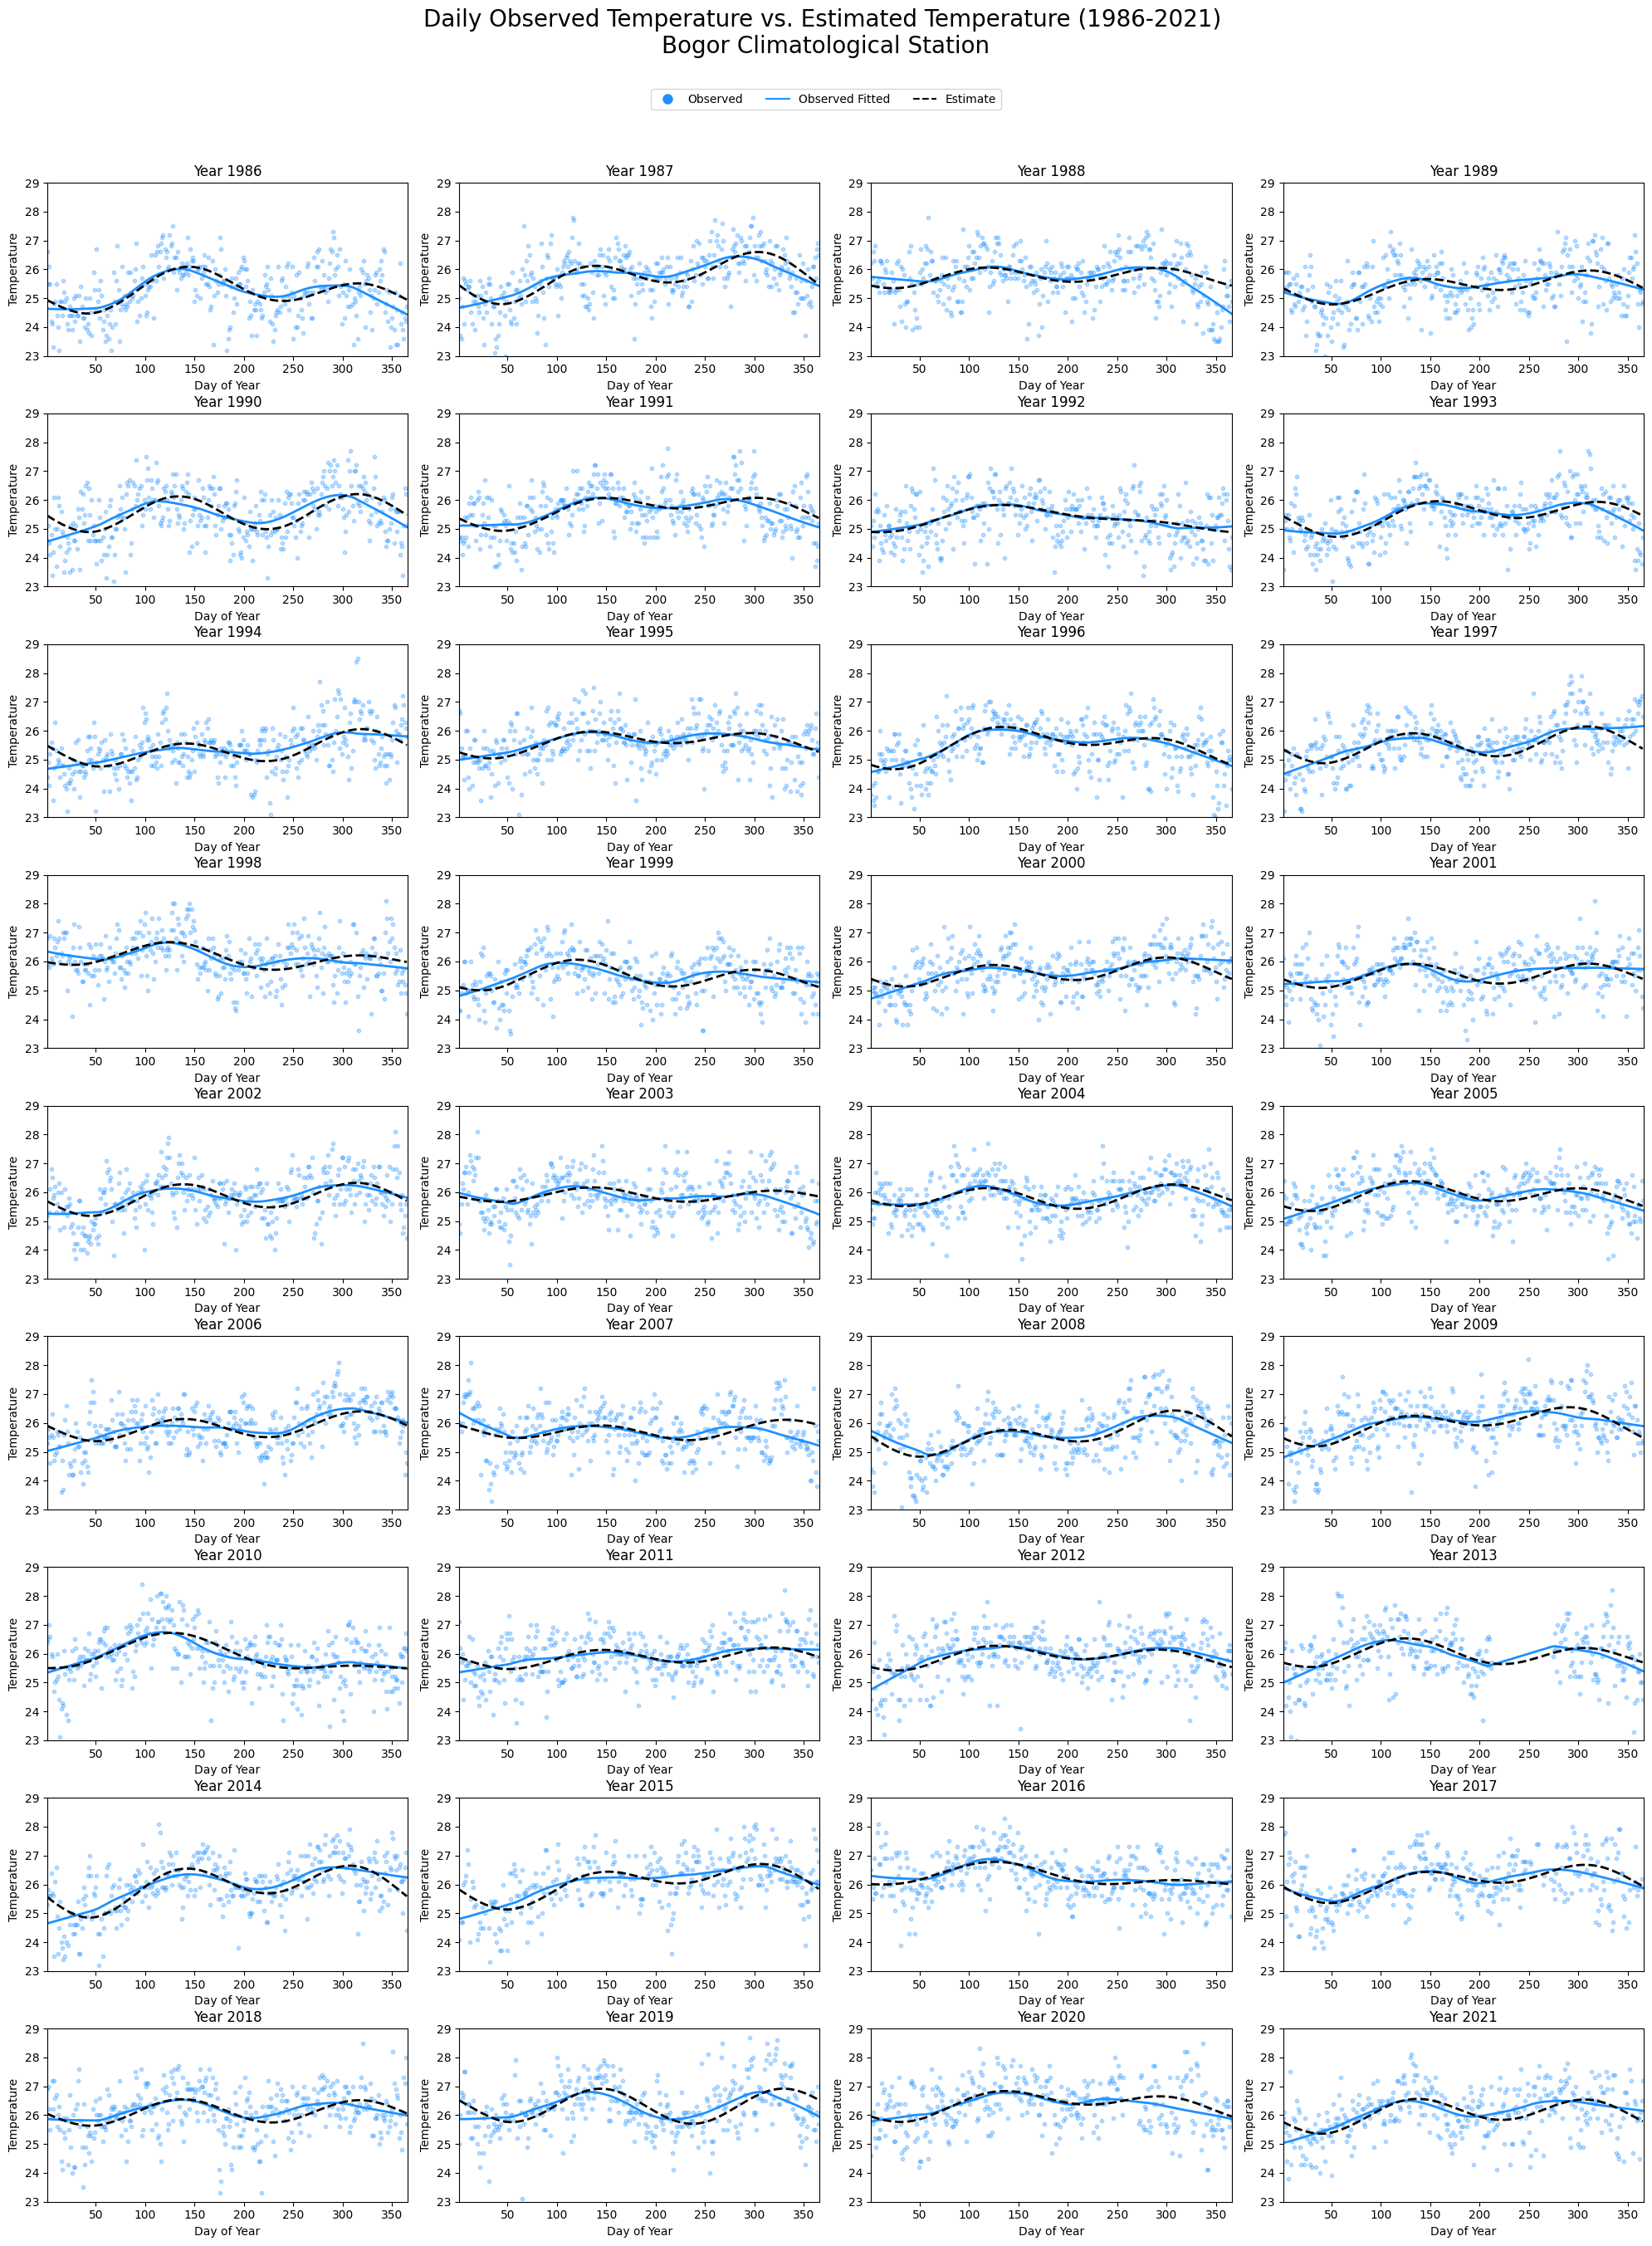

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data
df_wide = pd.read_csv(f'{output_path}/bogor_temperature_wide_format.csv', sep=';')
df_estimates = pd.read_csv(f'{output_path}/bogor_temperature_estimates.csv', sep=';')

# Define the layout of the subplots
nrows = 9
ncols = 4

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 30))

years = np.arange(1986, 2022)

# Create custom legend
scatter = plt.Line2D([0], [0], marker='o', color='w', label='Observed', markerfacecolor='dodgerblue', markersize=10)
estimate_line = plt.Line2D([0], [0], color='black', label='Estimate', linestyle='dashed')
loess_line = plt.Line2D([0], [0], color='dodgerblue', label='Observed Fitted')

# Iterate over each subplot and plot the data for the corresponding year
for i, ax in enumerate(axs.flat):
    if i < len(years):
        year = years[i]

        # Add x-axis and y-axis labels
        ax.set_xlabel('Day of Year')
        ax.set_ylabel('Temperature')
        ax.set_title(f'Year {year}')
        ax.set_xlim(1, 366)
        ax.set_ylim(23, 29)
        # ax.set_ylim(df_wide[str(year)].min(), df_wide[str(year)].max())

        # Scatter plot
        ax.scatter(df_wide['dayofyear'], df_wide[str(year)], color='dodgerblue', alpha=0.3, s=10)

        # LOESS smoothing
        z = sm.nonparametric.lowess(df_wide[str(year)], df_wide['dayofyear'], frac=0.3)
        ax.plot(z[:, 0], z[:, 1], color='dodgerblue', linewidth=2)

        # Plot estimates as dashed line
        ax.plot(df_estimates['dayofyear'], df_estimates[str(year)], color='black', linestyle='dashed', linewidth=2)

    else:
        ax.axis('off')  # Hide empty subplots

# Add overall plot title
plt.suptitle('Daily Observed Temperature vs. Estimated Temperature (1986-2021) \nBogor Climatological Station', fontsize=20, y=0.9)

# Add common legend
fig.legend(handles=[scatter, loess_line, estimate_line], loc='upper center', bbox_to_anchor=(0.5, 0.87), ncol=3)

plt.tight_layout()

# Adjust the positioning of the top-most subplot titles so that they don't overlap with the figure title or legend
plt.subplots_adjust(top=0.83)

# Save the figure
plt.savefig(f'{image_path}/bogor_observer_vs_estimate_temperature.png', dpi=300)

# Preview the output
plt.show()


## 4.7. Autocorrelated Error Calculation

This code calculates the autocorrelated error between the observed temperature and the estimated temperature from the Fourier model for each year, and stores the errors in a dataframe.

Firstly, we load the wide-format data and the estimated temperature data. Then, we specify an autocorrelation factor (r), which is a parameter that describes the correlation between values of the error at different points in time.

We loop over each year from 1986 to 2022, and for each year we:

1. Calculate the difference between the observed and estimated temperatures to get the error.
2. Generate a sequence of random numbers from a normal distribution, called white noise.
3. Compute the autocorrelated error. The error for the first day is simply the white noise, and for each subsequent day, the error is the autocorrelation factor multiplied by the previous day's error, plus the white noise for that day.
4. Finally, we create a DataFrame from the dictionary of autocorrelated errors, and save it to a CSV file.

This autocorrelated error represents the error in our model's estimate that cannot be explained by the model itself, but rather depends on previous errors. This could be due to factors that we did not include in our model, such as atmospheric conditions or climate change. By including this autocorrelation in our analysis, we can better understand and model these unexplained variations in temperature.

In [ ]:
import numpy as np

# Load the data
df_wide = pd.read_csv(f'{output_path}/bogor_temperature_wide_format.csv', sep=';')
df_estimates = pd.read_csv(f'{output_path}/bogor_temperature_estimates.csv', sep=';')

# Autocorrelation factor
r = 0.3  # autocorrelation factor, to be determined empirically

np.random.seed(42)  # for reproducibility

years = range(1986, 2022)
error_autocorrelated = {}

for year in years:
    # Calculate the error between observed and estimated temperature for each year
    error = df_wide[str(year)] - df_estimates[str(year)]

    # Add a white noise component to the error
    white_noise = np.random.normal(0, 1, len(error))  # zero mean, standard deviation of 1

    # Compute the autocorrelated error
    error_autocorrelated_year = [white_noise[0]]  # The error on the first day is just white noise
    for i in range(1, len(error)):
        e_i = r * error_autocorrelated_year[i-1] + white_noise[i]
        error_autocorrelated_year.append(e_i)

    # Store the autocorrelated errors for this year
    error_autocorrelated[str(year)] = error_autocorrelated_year

# Save data into csv format
error_autocorrelated_df = pd.DataFrame(error_autocorrelated, index=df_wide['dayofyear'])
error_autocorrelated_df.to_csv(f'{output_path}/bogor_autocorrelated_error.csv', sep=';', index_label='dayofyear')

# Preview the output
error_autocorrelated_df


,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
dayofyear,,,,,,,,,,,,,,,,,,,,,
1,0.496714,0.224092,0.408253,0.916328,-0.580523,0.708214,0.425887,-0.925425,1.578118,-1.207022,...,1.847867,-1.199204,0.799068,0.181781,-2.342478,-0.273152,1.140786,1.676423,-0.853920,1.429520
2,0.010750,0.079820,-1.580108,0.621387,0.414421,0.445680,0.146914,-0.022244,1.458885,-1.437419,...,1.744890,0.087935,0.245852,0.348953,-0.403072,1.262339,0.635245,1.228963,1.705892,0.125763
3,0.650914,0.121622,0.555123,1.184426,1.794231,1.086841,-0.597413,-0.902019,1.306820,1.245167,...,0.322782,0.570840,-0.484378,0.478339,-0.526951,1.763207,0.776095,1.627575,-0.280236,0.208172
4,1.718304,-0.736523,0.639134,-2.540928,0.932941,0.613176,0.308648,-0.678707,-0.063493,-0.571957,...,-0.307861,-0.923242,0.849065,-0.119074,0.379095,0.780996,-1.438504,0.582954,-1.277450,0.789322
5,0.281338,-0.196447,0.447770,1.326096,-0.916001,-0.428484,1.896943,-1.199427,-0.908289,-1.324938,...,0.937246,-0.417248,0.782756,1.245661,1.057943,-1.106961,-0.060497,-0.632330,-0.063307,0.790940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.619703,0.342722,0.263178,1.103933,0.427409,0.019214,-0.756539,-0.063633,-0.495782,0.351970,...,-0.775679,0.362682,-0.344514,0.051490,-0.407601,0.485130,-1.309992,0.727427,-2.044484,1.102286
363,0.377151,-0.436943,0.811594,0.192724,-0.962176,2.030074,0.100859,0.072662,1.269797,0.112770,...,-1.342159,1.730678,-0.306673,0.767930,-0.602443,1.271933,-1.437664,0.512805,-0.823703,-0.255265
364,0.514857,-0.909388,0.162761,-1.166481,1.122279,-0.754152,0.954528,0.274039,-2.106870,-2.052647,...,1.310064,-0.000631,1.030202,-0.357730,-0.150592,0.282971,0.023577,-0.492995,-0.568190,0.432466


## 4.8. Final Estimates Adjusted Temperature

We integrated the autocorrelated error into our temperature estimates to generate a more refined model of temperature estimation. With this data in place, we transformed our wide-format data into a long-format data frame. Each row of this data frame represented a specific day from a specific year, containing information on the date, observed temperature, estimated temperature, error, and the adjusted estimated temperature (estimate + error).

This transformed format provided us with a holistic and granular view of our data, suitable for subsequent detailed analyses. Once the transformation was complete, the data was saved into a CSV file, enabling easy access for further research or data visualization tasks.

In [ ]:
import pandas as pd

# Load the data
df_wide = pd.read_csv(f'{output_path}/bogor_temperature_wide_format.csv', sep=';')
df_estimates = pd.read_csv(f'{output_path}/bogor_temperature_estimates.csv', sep=';')
df_error_autocorrelated = pd.read_csv(f'{output_path}/bogor_autocorrelated_error.csv', sep=';')

# Add the autocorrelated error to the estimates
df_estimates_error = df_estimates.copy()
for year in range(1986, 2022):
    df_estimates_error[str(year)] += df_error_autocorrelated[str(year)]

# Prepare final dataframe
df_final = pd.DataFrame()

for year in range(1986, 2022):
    year_data = pd.DataFrame()
    year_data['date'] = pd.to_datetime(df_wide['dayofyear'], format='%j').apply(lambda dt: dt.replace(year=year))
    year_data['observed'] = df_wide[str(year)]
    year_data['estimate'] = df_estimates[str(year)]
    year_data['error'] = df_error_autocorrelated[str(year)]
    year_data['estimate_error'] = df_estimates_error[str(year)]

    df_final = pd.concat([df_final, year_data])

# Save the final dataframe to a new CSV file
df_final.to_csv(f'{output_path}/bogor_final_temperature_data_long_format.csv', sep=';', index=False)

# Preview the output
df_final


,date,observed,estimate,error,estimate_error
0,1986-01-01,26.6,24.930235,0.496714,25.426950
1,1986-01-02,25.5,24.912596,0.010750,24.923346
2,1986-01-03,26.1,24.895027,0.650914,25.545941
3,1986-01-04,25.5,24.877551,1.718304,26.595855
4,1986-01-05,24.2,24.860187,0.281338,25.141525
...,...,...,...,...,...
361,2021-12-28,24.5,25.838125,1.102286,26.940411
362,2021-12-29,26.1,25.819776,-0.255265,25.564511
363,2021-12-30,26.5,25.801547,0.432466,26.234013
364,2021-12-31,27.2,25.783458,0.784095,26.567553


This script reads a dataset containing temperature data for Bogor, converts the 'date' field to datetime and computes the year for each observation. It then generates a scatter plot of the observed temperatures across the years, and plots a Lowess (locally weighted scatterplot smoothing) line to represent the estimated temperature with error over the same period. The observed temperatures are plotted in dodger blue, while the Lowess line is plotted in red.

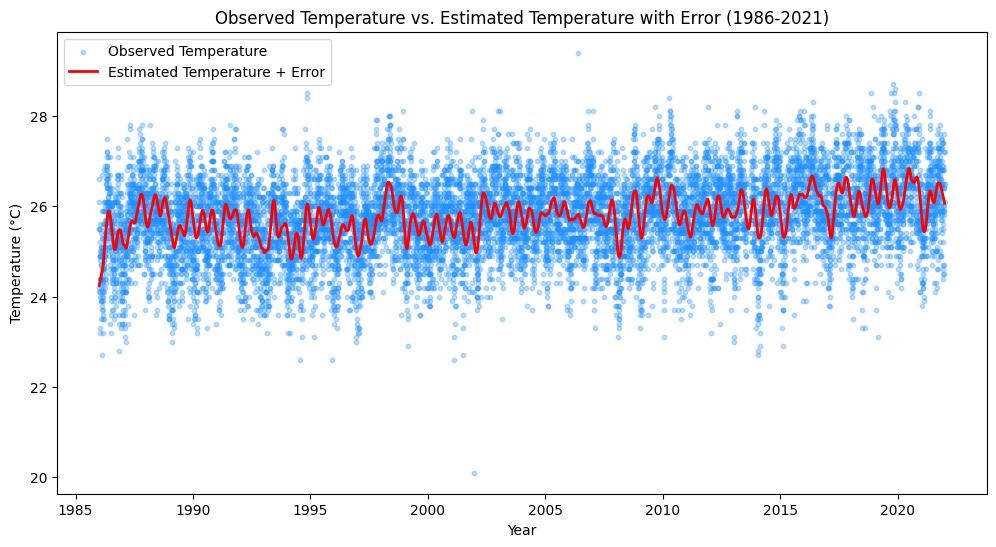

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the final data
df_final = pd.read_csv(f'{output_path}/bogor_final_temperature_data_long_format.csv', sep=';')

# Convert 'date' to datetime
df_final['date'] = pd.to_datetime(df_final['date'])
df_final['year'] = df_final['date'].dt.year + df_final['date'].dt.dayofyear / 365.25

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot for observed temperature
observed_temp = ax.scatter(df_final['year'], df_final['observed'], alpha=0.3, s=10, color='dodgerblue')

# LOESS smoothing for estimate_error
z = sm.nonparametric.lowess(df_final['estimate_error'], df_final['year'], frac=0.01)
estimated_temp, = ax.plot(z[:, 0], z[:, 1], color='red', linewidth=2)

# Set title and labels
ax.set_title('Observed Temperature vs. Estimated Temperature with Error (1986-2021)')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')

# Add the legend
ax.legend((observed_temp, estimated_temp), ('Observed Temperature', 'Estimated Temperature + Error'))

# Save the figure
plt.savefig(f'{image_path}/bogor_observer_vs_estimate_and_error_temperature.png', dpi=300)

# Preview the ouput
plt.show()


## 4.9. Visualization of Error and Estimated vs Observer Temperature

This plot compares the observed temperature to both the Fourier series model estimates and the estimates adjusted for autocorrelated error.

The plot consists of a series of subplots, each representing a year from 1986 to 2021. The x-axis represents the day of the year, the left y-axis represents the temperature, and the right y-axis represents the autocorrelated error.

In each subplot, you can observe:

1. The observed temperature as blue dots.
2. The fitted line for the observed data (LOESS smoothing of observed data) in blue.
3. The original Fourier series estimates as a dashed black line.
4. The estimates adjusted for autocorrelated error (Fourier estimates + autocorrelated error) fitted line in dark gray.
5. The autocorrelated error plotted against the secondary y-axis (right side) in semi-transparent red.

The inclusion of autocorrelated error helps model the residuals in our temperature estimation, potentially improving the predictive accuracy. From the plot, it can be seen that the estimated temperature adjusted for autocorrelated error (dark gray line) tends to follow the fluctuations of the observed data (blue line) more closely than the original Fourier series estimates (dashed black line). This suggests that the autocorrelated error accounts for some of the temperature variations that the Fourier model alone could not capture.

Finally, the plot is saved to a .png file with a resolution of 300 dpi.

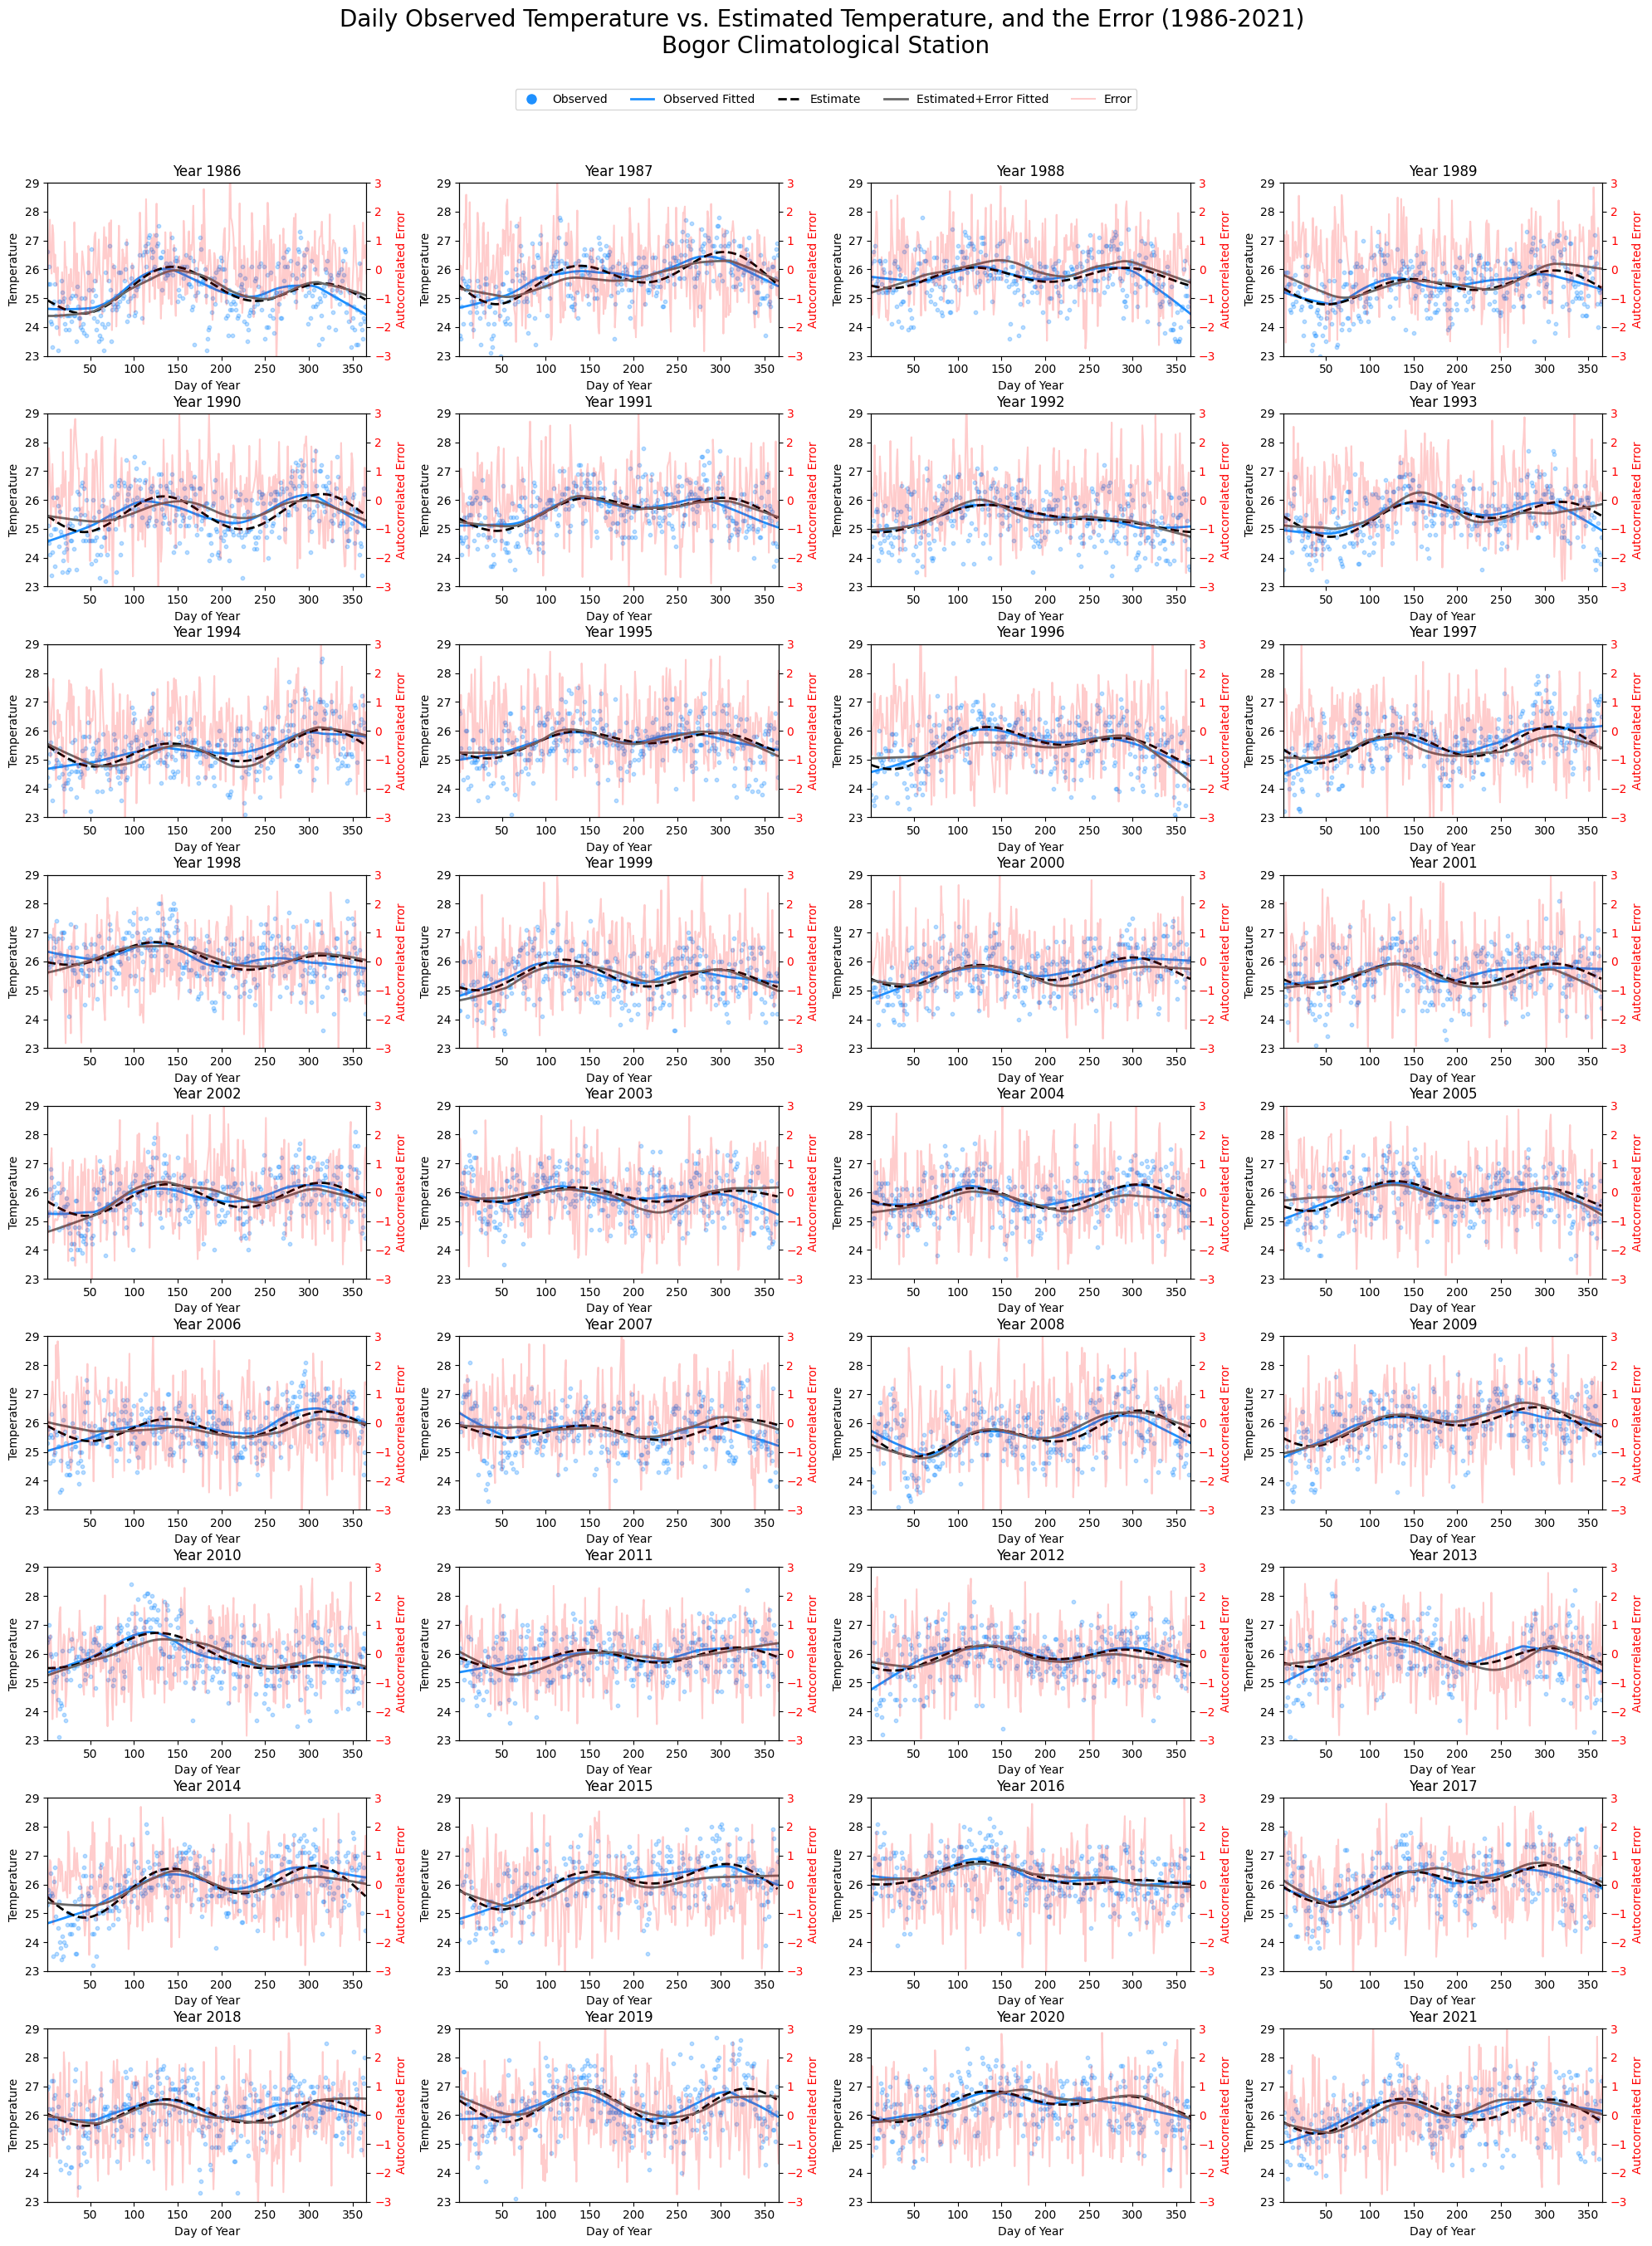

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data
df_wide = pd.read_csv(f'{output_path}/bogor_temperature_wide_format.csv', sep=';')
df_estimates = pd.read_csv(f'{output_path}/bogor_temperature_estimates.csv', sep=';')
df_error_autocorrelated = pd.read_csv(f'{output_path}/autocorrelated_error.csv', sep=';')

# Add the autocorrelated error to the estimates
df_estimates_error = df_estimates.copy()
for year in range(1986, 2022):
    df_estimates_error[str(year)] += df_error_autocorrelated[str(year)]

# Define the layout of the subplots
nrows = 9
ncols = 4

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 30))

years = np.arange(1986, 2022)

# Create custom legend
scatter = plt.Line2D([0], [0], marker='o', color='w', label='Observed', markerfacecolor='dodgerblue', markersize=10)
loess_observerd_line = plt.Line2D([0], [0], color='dodgerblue', label='Observed Fitted', linewidth=2)
estimate_line = plt.Line2D([0], [0], color='black', label='Estimate', linestyle='dashed', linewidth=2)
loess_estimate_and_error_line = plt.Line2D([0], [0], color='dimgrey', label='Estimated+Error Fitted', linewidth=2)
error_line = plt.Line2D([0], [0], color='red', alpha=0.2, label='Error')

# Iterate over each subplot and plot the data for the corresponding year
for i, ax in enumerate(axs.flat):
    if i < len(years):
        year = years[i]

        # Add x-axis and y-axis labels
        ax.set_xlabel('Day of Year')
        ax.set_ylabel('Temperature')
        ax.set_title(f'Year {year}')
        ax.set_xlim(1, 366)
        ax.set_ylim(23, 29)
        # ax.set_ylim(df_wide[str(year)].min(), df_wide[str(year)].max())

        # Create secondary y-axis for the autocorrelated error
        ax_error = ax.twinx()
        ax_error.plot(df_error_autocorrelated['dayofyear'], df_error_autocorrelated[str(year)], color='red', alpha=0.2)
        ax_error.set_ylabel('Autocorrelated Error', color='red')
        ax_error.tick_params(axis='y', labelcolor='red')
        ax_error.set_ylim(-3, 3)

        # Scatter plot
        ax.scatter(df_wide['dayofyear'], df_wide[str(year)], color='dodgerblue', alpha=0.3, s=10)

        # LOESS smoothing for observed data
        z = sm.nonparametric.lowess(df_wide[str(year)], df_wide['dayofyear'], frac=0.3)
        ax.plot(z[:, 0], z[:, 1], color='dodgerblue', linewidth=2)

        # Plot estimates as dashed line
        ax.plot(df_estimates['dayofyear'], df_estimates[str(year)], color='black', linestyle='dashed', linewidth=2)

        # LOESS smoothing for error data
        z_error = sm.nonparametric.lowess(df_estimates_error[str(year)], df_wide['dayofyear'], frac=0.3)
        ax.plot(z_error[:, 0], z_error[:, 1], color='dimgrey', linewidth=2)

    else:
        ax.axis('off')  # Hide empty subplots

# Add overall plot title
plt.suptitle('Daily Observed Temperature vs. Estimated Temperature, and the Error (1986-2021) \nBogor Climatological Station', fontsize=20, y=0.9)

# Add common legend
fig.legend(handles=[scatter, loess_observerd_line, estimate_line, loess_estimate_and_error_line, error_line], loc='upper center', bbox_to_anchor=(0.5, 0.87), ncol=5)

plt.tight_layout()

# Adjust the positioning of the top-most subplot titles so that they don't overlap with the figure title or legend
plt.subplots_adjust(top=0.83)

# Save the figure
plt.savefig(f'{image_path}/bogor_observer_vs_estimate_and_error_temperature.png', dpi=300)

# Preview the ouput
plt.show()


----

End of the notebook